<center>

**Aspectos Aritméticos de la Teoría de Ehrhart**

</center>

<p align="center">
    <img src="https://logowik.com/content/uploads/images/escudo-de-la-universidad-nacional-de-colombia-20163327.logowik.com.webp" width="400">
</p>


<center>

<div align="justify">

> **Nota de agradecimiento:**
>
> La elaboración de este material contó con la valiosa colaboración de Sophia Elia, quien proporcionó recursos de referencia y contribuciones conceptuales significativas. Su apoyo fue fundamental para el desarrollo y estructuración de los contenidos presentados. Más información sobre su trabajo puede encontrarse en [https://sophiasage.github.io/](https://sophiasage.github.io/).

</div>

# **Poliedros**

<div align="justify">



</div>

## **Cálculos en poliedros**

---

<div align="justify">

Una matriz real $A$ de tamaño $k \times d$ y un vector real $b$ en $\mathbb{R}^d$ definen un politopo convexo $P$ como el conjunto de soluciones del sistema de desigualdades lineales:

$$A \cdot x + b \geq 0$$

Cada fila de $A$ define un semiespacio cerrado en $\mathbb{R}^d$. Por lo tanto, un politopo es la intersección de un número finito de semiespacios cerrados en $\mathbb{R}^d$. La matriz $A$ puede contener filas repetidas, lo cual puede llevar a un conjunto de igualdades satisfechas por el politopo. Si no hay filas redundantes en esta definición, se dice que se tiene la representación-$\mathbf{H}$ del politopo.

Un subespacio afín máximo $L$ contenido en un politopo se llama espacio de linealidad de $P$. Fijando un punto $o$ del espacio de linealidad $L$ para actuar como el origen, todo punto $p$ dentro del politopo puede escribirse como una combinación:

$$p = \ell + \sum_{i=1}^n \lambda_i v_i + \sum_{i=1}^m \mu_i r_i,$$

Donde $\ell \in L$, usando $o$ como origen, $\sum_{i=1}^{n} \lambda_i = 1$, $\lambda_i \geq 0$, $\mu_i \geq 0$, y $r_i \ne 0$ para todo $0 \leq i \leq m$, y el conjunto de vectores $r_i$ es positivamente independiente, es decir, el origen no pertenece a su combinatoria positiva.

Para un punto dado $p$, puede haber muchas formas equivalentes de escribir la expresión anterior utilizando diferentes conjuntos $\{v_i\}_{i=1}^n$ y $\{r_i\}_{i=1}^m$. Por lo tanto, se requiere que estos conjuntos sean minimalmente inclusivos, de modo que se cumpla la igualdad anterior para todo punto $p \in P$.

Los vectores $v_i$ se denominan vértices de $P$, y los vectores $r_i$ se llaman rayos de $P$. Esta forma de representar un politopo se conoce como la representación-$\mathbf{V}$ de un politopo. La primera suma representa la envolvente convexa de los vértices $v_i$, y la segunda suma representa un cono poliédrico apuntado generado por un número finito de rayos.

Cuando el espacio de linealidad y los rayos se reducen a un punto, es decir, sin rayos ni líneas, el objeto se denomina comúnmente un politopo.


</div>

### **V - Representación**

<center>

**👨‍💻Implementación👩‍💻**

In [ ]:

P1 = Polyhedron(vertices=[[1, 0], [0, 1]], rays=[[1, 1]])
P1

<center>

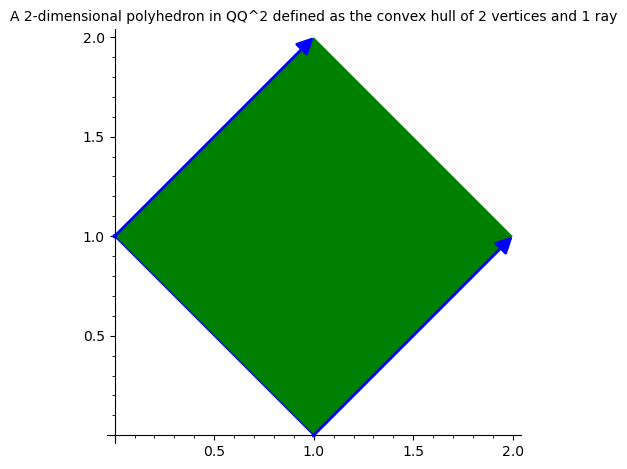
</center>

---

<div align="justify">

La representación en forma de cadena ya proporciona mucha información:

- la dimensión del politopo (el espacio afín más pequeño que lo contiene)
- la dimensión del espacio en el que está definido
- el anillo base ($\mathbb{Z}^d$) sobre el cual está definido el politopo (esto determina su clase padre, véase *Parents for Polyhedra*)
- el número de vértices
- el número de rayos


</div>

---

También puede añadirse un espacio de linealidad al politopo.


---

**👨‍💻Implementación👩‍💻**

In [ ]:

P2 = Polyhedron(vertices=[[1/2, 0, 0], [0, 1/2, 0]],rays=[[1, 1, 0]],lines=[[0, 0, 1]])
P2
P2.plot()

<center>

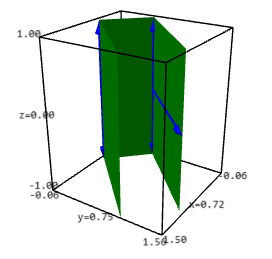

</center>

---

<div align="justify">

Obsérvese que el anillo base cambia debido al valor $1/2$. En efecto, Sage determina automáticamente un anillo adecuado para definir el objeto.



</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

P1.parent()

Polyhedra in QQ^2

**👨‍💻Implementación👩‍💻**

In [ ]:

P2.parent()

Polyhedra in QQ^3

---

<div align="justify">

El anillo seleccionado depende del formato de entrada proporcionado.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

P3 = Polyhedron(vertices=[[0.5, 0], [0, 0.5]])
P3


A 1-dimensional polyhedron in RDF^2 defined as the convex hull of 2 vertices

**👨‍💻Implementación👩‍💻**

In [ ]:
P3.parent()

Polyhedra in RDF^2

---

<div align="justify">

> El anillo base RDF debe utilizarse con precaución.  
Al no ser un anillo exacto, ciertos cálculos pueden fallar o producir resultados incorrectos de forma silenciosa, especialmente al trabajar con poliedros no simpliciales.



</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

D = polytopes.dodecahedron()
D

<div align="justify">

A 3-dimensional polyhedron in (Number Field in sqrt5 with defining polynomial x^2 - 5 with sqrt5 = 2.236067977499790?)^3 defined as the convex hull of 20 vertices

</div>



**👨‍💻Implementación👩‍💻**

In [ ]:

vertices_RDF = [n(v.vector(),digits=6) for v in D.vertices()]
D_RDF = Polyhedron(vertices=vertices_RDF, base_ring=RDF)

<div align="justify">

UserWarning: This polyhedron data is numerically complicated; cdd
could not convert between the inexact V and H representation
without loss of data. The resulting object might show
inconsistencies.

</div>

**👨‍💻Implementación👩‍💻**

In [ ]:

D_RDF = Polyhedron(vertices=sorted(vertices_RDF), base_ring=RDF)

<div align="justify">

Traceback (most recent call last):

ValueError: *Error: Numerical inconsistency is found.  Use the GMP exact arithmetic.

</div>

---

<div align="justify">

Si la entrada del politopo consiste en números flotantes de Python, los datos se convierten automáticamente al anillo RDF.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

Polyhedron(vertices=[[float(1.1)]])

<center>

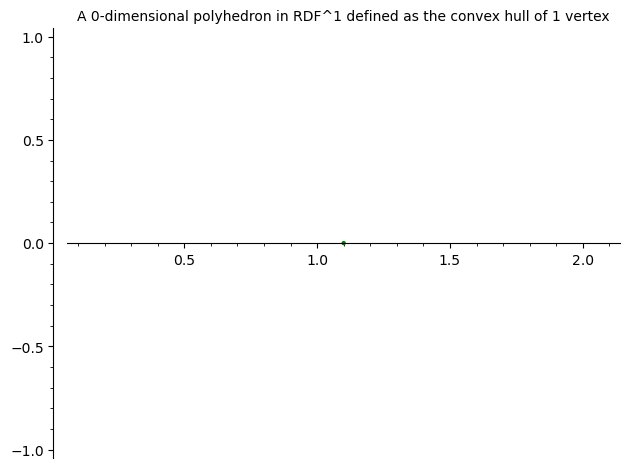

</center>

---

<div align="justify">

También es posible definir un politopo sobre el cuerpo de los números algebraicos.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

sqrt_2 = AA(2)^(1/2)
cbrt_2 = AA(2)^(1/3)
timeit('Polyhedron(vertices=[[sqrt_2, 0], [0, cbrt_2]])')

5 loops, best of 3: 43.2 ms per loop

**👨‍💻Implementación👩‍💻**

In [ ]:

P4 = Polyhedron(vertices=[[sqrt_2, 0], [0, cbrt_2]]); P4

<center>

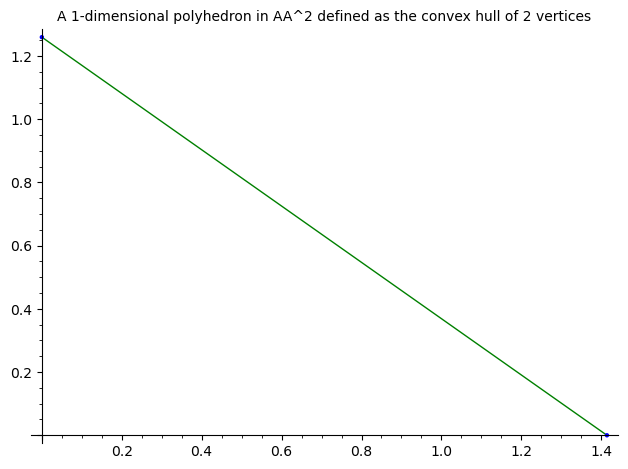

</center>

---

<div align="justify">

Existe otra manera de construir un politopo sobre el cuerpo de los números algebraicos:


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

K.<a> = NumberField(x^2 - 2, embedding=AA(2)**(1/2))
L.<b> = NumberField(x^3 - 2, embedding=AA(2)**(1/3))
timeit('Polyhedron(vertices=[[a, 0], [0, b]])')

5 loops, best of 3: 11.6 ms per loop

**👨‍💻Implementación👩‍💻**

In [ ]:

P5 = Polyhedron(vertices=[[a, 0], [0, b]]); P5

<center>

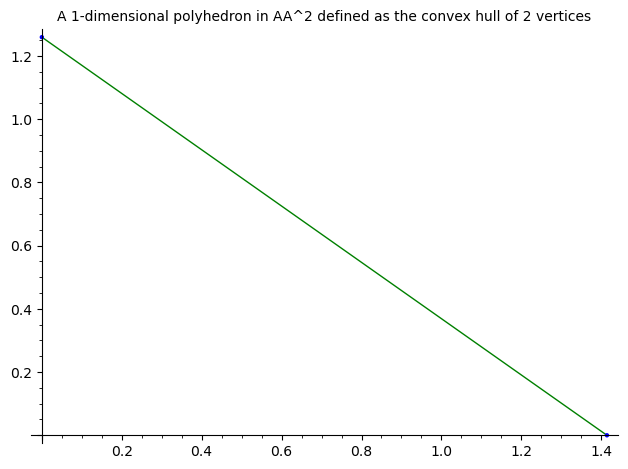

</center>

---

<div align="justify">

Si se conoce el anillo base, puede ser una buena opción utilizar la función composite_fields() del módulo sage.rings.number_field.number_field.



</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

J = K.composite_fields(L)[0]
timeit('Polyhedron(vertices=[[J(a), 0], [0, J(b)]])')

25 loops, best of 3: 9.8 ms per loop

**👨‍💻Implementación👩‍💻**

In [ ]:

P5_comp = Polyhedron(vertices=[[J(a), 0], [0, J(b)]]); P5_comp

<center>

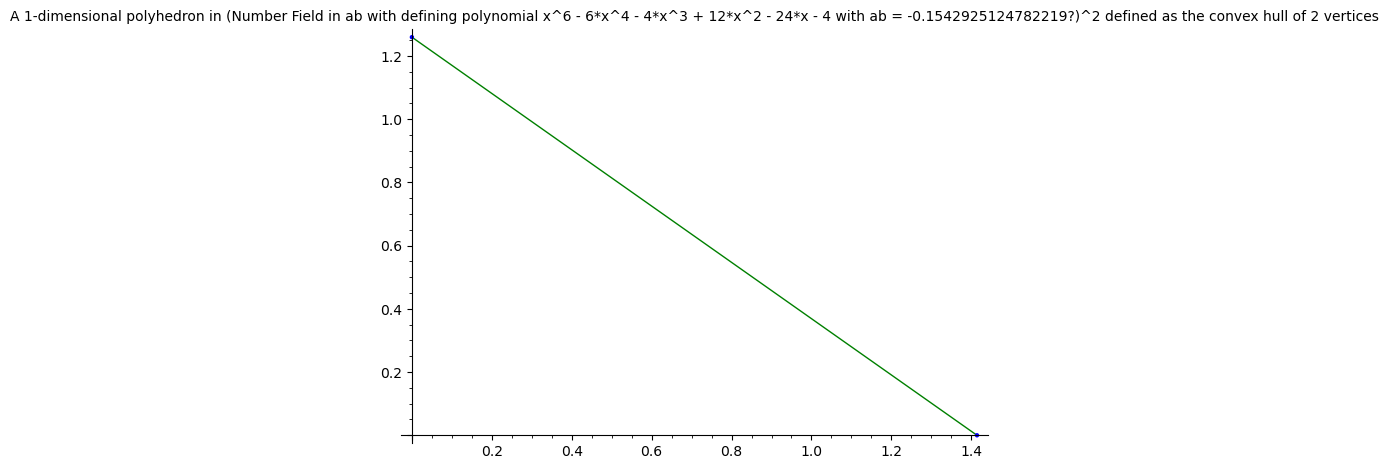

</center>

---

<div align="justify">

Los cálculos poliedrales con el anillo simbólico no están implementados.  
No es posible definir un politopo sobre dicho anillo.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

sqrt_2s = sqrt(2)
cbrt_2s = 2^(1/3)
Polyhedron(vertices=[[sqrt_2s, 0], [0, cbrt_2s]])

Traceback (most recent call last):

ValueError: no default backend for computations with Symbolic Ring

---

<div align="justify">

De manera similar, no es posible crear objetos poliedros sobre el anillo RR, independientemente de la cantidad de bits de precisión utilizada.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

F45 = RealField(45)
F100 = RealField(100)
f = 1.1
Polyhedron(vertices=[[F45(f)]])

Traceback (most recent call last):

ValueError: the only allowed inexact ring is 'RDF' with backend 'cdd'

**👨‍💻Implementación👩‍💻**

In [ ]:

Polyhedron(vertices=[[F100(f)]])

Traceback (most recent call last):

ValueError: the only allowed inexact ring is 'RDF' with backend 'cdd'

### **H - Representación**

<center>

---

<div align="justify">

Si un objeto politopo ha sido construido mediante una representación-$\mathbf{H}$, Sage puede proporcionar su correspondiente representación-$\mathbf{V}$.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

for h in P1.Hrepresentation():
    print(h)

An inequality (1, 1) x - 1 >= 0

An inequality (1, -1) x + 1 >= 0

An inequality (-1, 1) x + 1 >= 0

---

<div align="justify">

Cada línea corresponde a una fila de la matriz $A$ y a una entrada del vector $b$.  
La variable $x$ es un vector en el espacio ambiente en el que está definido $P_1$.  
La representación-$\mathbf{H}$ puede incluir ecuaciones:



</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

P3.Hrepresentation()

(An inequality (-2.0, 0.0) x + 1.0 >= 0,

 An inequality (1.0, 0.0) x + 0.0 >= 0,

 An equation (1.0, 1.0) x - 0.5 == 0)

---

<div align="justify">

La construcción de un objeto politopo mediante su representación-$\mathbf{H}$ requiere un formato específico. Cada desigualdad $(a_{i1}, \dots, a_{id}) \cdot x + b_i \geq 0$ debe escribirse como  `[b_i, a_i1, ..., a_id]`.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

P3_H = Polyhedron(ieqs = [[1.0, -2, 0], [0, 1, 0]], eqns = [[-0.5, 1, 1]])
P3 == P3_H


True

**👨‍💻Implementación👩‍💻**

In [ ]:

P3_H.Vrepresentation()

(A vertex at (0.0, 0.5), A vertex at (0.5, 0.0))

---

<div align="justify">

Vale la pena utilizar el parámetro `eqns` para simplificar la construcción del objeto.  
En el siguiente ejemplo, las primeras cuatro filas son el negativo del segundo grupo de cuatro filas.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

H = [[0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [-2, 1, 1, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, -1],
 [0, 0, 0, 0, 0, 0, -1, 0, 0],
 [2, -1, -1, -1, -1, -1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, -1, 0],
 [2, -1, -1, -1, -1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [-1, 1, 1, 1, 1, 0, 0, 0, 0],
 [1, 0, 0, -1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, -1, 0, 0, 0, 0],
 [1, 0, -1, 0, 0, 0, 0, 0, 0],
 [1, -1, 0, 0, 0, 0, 0, 0, 0]]
timeit('Polyhedron(ieqs = H)')

125 loops, best of 3: 5.99 ms per loop

**👨‍💻Implementación👩‍💻**

In [ ]:

timeit('Polyhedron(ieqs = H[8:], eqns = H[:4])')

timeit('Polyhedron(ieqs = H[8:], eqns = H[:4])')

**👨‍💻Implementación👩‍💻**

In [ ]:

Polyhedron(ieqs = H) == Polyhedron(ieqs = H[8:], eqns = H[:4])

True

### **Métodos para los poliedros**

<center>

---

<div align="justify">

H y V - Representación

</div>

---

<center>

| Método                         | Descripción                                                                 |
|-------------------------------|-----------------------------------------------------------------------------|
| `base_ring()`                 | Anillo sobre el cual está definido el politopo                            |
| `ambient_space()`             | Espacio vectorial ambiente o módulo libre                                  |
| `Hrepresentation_space()`     | Espacio vectorial o módulo libre usado para los vectores de la representación-$\mathbf{H}$ |
| `Vrepresentation_space()`     | Espacio vectorial o módulo libre usado para los vectores de la representación-$\mathbf{V}$ |
| `n_Hrepresentation()`         | Número de elementos en la representación-$\mathbf{H}$ (suma de ecuaciones e inecuaciones) |
| `n_Vrepresentation()`         | Número de elementos en la representación-$\mathbf{V}$ (suma de vértices, rayos y líneas) |
| `n_equations()`               | Número de ecuaciones                                                       |
| `n_inequalities()`            | Número de inecuaciones                                                     |
| `n_vertices()`                | Número de vértices                                                         |
| `n_rays()`                    | Número de rayos                                                            |
| `n_lines()`                   | Número de líneas                                                           |
| `n_facets()`                  | Número de facetas                                                          |


</center>

---

<div align="justify">

Propiedades booleanas de los poliedros

</div>

---

<center>

| Método                        | Descripción                                                                 |
|------------------------------|-----------------------------------------------------------------------------|
| `is_empty()`                 | Verifica si el politopo está vacío                                          |
| `is_universe()`             | Verifica si el politopo coincide con todo el espacio ambiente               |
| `is_full_dimensional()`     | Verifica si el politopo tiene la misma dimensión que el espacio ambiente    |
| `is_combinatorially_isomorphic()` | Verifica si dos politopos son isomorfos combinatoriamente         |
| `is_compact()`              | Verifica la compacidad o acotación del politopo                             |
| `is_lattice_polytope()`     | Verifica si el politopo es un politopo de retículo                          |
| `is_inscribed()`            | Verifica si el politopo está inscrito en una esfera                         |
| `is_minkowski_summand()`    | Verifica si el politopo puede usarse como sumando de Minkowski              |
| `is_neighborly()`           | Verifica si el politopo tiene esqueleto completo hasta la mitad de la dimensión |
| `is_reflexive()`            | Verifica si el dual de un politopo de retículo también es de retículo (solo para `Polyhedron` sobre $\mathbb{Z}$) |
| `is_simple()`               | Verifica si el grado de cada vértice coincide con la dimensión del politopo  |
| `is_simplex()`              | Verifica si el politopo es un simplex                                       |
| `is_simplicial()`           | Verifica si todas las caras del politopo son símplices                      |
| `is_lawrence_polytope()`    | Verifica si el politopo es un politopo de Lawrence                          |
| `is_self_dual()`            | Verifica si el politopo es autodual                                         |
| `is_pyramid()`              | Verifica si el politopo es una pirámide sobre una de sus facetas            |
| `is_bipyramid()`            | Verifica si el politopo es combinatoriamente equivalente a una bipirámide   |
| `is_prism()`                | Verifica si el politopo es combinatoriamente equivalente a un prisma        |




</center>

---

<div align="justify">

Propiedades enumerativas

</div>

---

<center>

| Método                 | Descripción                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `ambient_dim()`        | Dimensión del espacio vectorial ambiente                                   |
| `dim()`                | Dimensión del politopo                                                     |
| `dimension()`          | Sinónimo de `dim()`                                                        |
| `f_vector()`           | Vector-$f$ (número de caras por dimensión)                                 |
| `flag_f_vector()`      | Vector-$f$ de banderas (número de cadenas de caras)                        |
| `neighborliness()`     | Mayor cardinalidad tal que todos los subconjuntos de $k$ vértices son caras del politopo |
| `simpliciality()`      | Mayor $k$ tal que todas las $k$-caras son símplices                        |
| `simplicity()`         | Mayor $k$ tal que el dual es $k$-simplicial                                |



</center>

---

<div align="justify">

Propiedades de aplicación

</div>

---

<center>

| Método           | Descripción                                  |
|------------------|----------------------------------------------|
| `backend()`      | Indica el motor (backend) utilizado          |
| `base_ring()`    | Devuelve el anillo base utilizado            |
| `change_ring()`  | Cambia el anillo base                        |


</center>

<div align="justify">



</div>

---

<div align="justify">

Transformación de poliedros

</div>

---

<center>

| Método                        | Descripción                                                                 |
|------------------------------|-----------------------------------------------------------------------------|
| `minkowski_sum()`            | Suma de Minkowski de dos politopos                                          |
| `minkowski_difference()`     | Diferencia de Minkowski entre dos politopos                                 |
| `minkowski_decompositions()` | Descomposición de Minkowski (solo para politopos sobre $\mathbb{Z}$)        |
| `product()`                  | Producto cartesiano de dos politopos                                        |
| `intersection()`             | Intersección de dos politopos                                               |
| `join()`                     | Unión combinatoria de dos politopos                                         |
| `convex_hull()`              | Envolvente convexo de la unión de dos politopos                             |
| `affine_hull_projection()`   | Construye un politopo afínmente equivalente de dimensión completa           |
| `barycentric_subdivision()`  | Construye una realización geométrica de la subdivisión baricéntrica         |
| `dilation()`                 | Dilitación escalar (ampliación o contracción)                               |
| `face_truncation()`          | Trunca una cara específica del politopo                                     |
| `face_split()`               | Devuelve la partición de una cara del politopo                              |
| `one_point_suspension()`     | Suspensión en un punto sobre un vértice (división de vértice)              |
| `stack()`                    | Apila una cara del politopo                                                 |
| `lattice_polytope()`         | Devuelve un politopo de retículo que lo contiene                            |
| `polar()`                    | Devuelve el dual polar de un politopo (debe ser compacto)                   |
| `prism()`                    | Prisma sobre un politopo (aumenta su dimensión y la del espacio ambiente)   |
| `pyramid()`                  | Pirámide sobre un politopo (aumenta su dimensión y la del espacio ambiente) |
| `bipyramid()`                | Bipirámide sobre un politopo (aumenta su dimensión y la del ambiente)       |
| `translation()`              | Realiza una traslación por un vector dado                                   |
| `truncation()`               | Trunca simultáneamente todos los vértices                                   |
| `lawrence_extension()`       | Devuelve la extensión de Lawrence sobre un punto dado                       |
| `lawrence_polytope()`        | Devuelve el politopo de Lawrence correspondiente                            |
| `wedge()`                    | Devuelve el politopo cuña (wedge) sobre una cara                            |


</center>

---

<div align="justify">

Combinatoria

</div>

---

<center>

| Método                                 | Descripción                                                     |
|----------------------------------------|-----------------------------------------------------------------|
| `combinatorial_polyhedron()`           | El politopo combinatorio                                        |
| `face_lattice()`                       | Retículo de caras                                               |
| `hasse_diagram()`                      | Diagrama de Hasse                                               |
| `combinatorial_automorphism_group()`   | Grupo de automorfismos del politopo combinatorio subyacente     |
| `graph()`, `vertex_graph()`            | Grafo subyacente                                                |
| `vertex_digraph()`                     | Digráfo (orientación de aristas determinada por una forma lineal) |
| `vertex_facet_graph()`                 | Digráfo bipartito con la adyacencia vértice-faceta              |
| `adjacency_matrix()`                   | Matriz de adyacencia                                            |
| `incidence_matrix()`                   | Matriz de incidencia                                            |
| `slack_matrix()`                       | Matriz de holgura (slack)                                       |
| `facet_adjacency_matrix()`            | Matriz de adyacencia entre facetas                              |
| `vertex_adjacency_matrix()`           | Matriz de adyacencia entre vértices                             |


</center>

---

<div align="justify">

Puntos enteros

</div>

---

<center>

| Método                        | Descripción                                                                 |
|------------------------------|-----------------------------------------------------------------------------|
| `ehrhart_polynomial()`       | Polinomio de Ehrhart para politopos sobre $\mathbb{Z}$                      |
| `ehrhart_polynomial()`       | Polinomio de Ehrhart para politopos sobre $\mathbb{Q}$                      |
| `ehrhart_quasipolynomial()`  | Cuasipolinomio de Ehrhart para politopos sobre $\mathbb{Q}$                 |
| `h_star_vector()`            | Vector $h^*$ para politopos con vértices integrales                         |
| `integral_points()`          | Lista de puntos con coordenadas enteras dentro del politopo                |
| `integral_points_count()`    | Número de puntos enteros en el politopo                                     |
| `get_integral_point()`       | Obtiene el $i$-ésimo punto entero sin calcular todos los puntos interiores |
| `has_IP_property()`          | Verifica si el origen es un punto interior y si el politopo es compacto (solo para politopos sobre $\mathbb{Z}$) |
| `random_integral_point()`    | Genera un punto entero aleatorio dentro del politopo                        |


</center>

<div align="justify">



</div>

---

<div align="justify">

Obtener objetos geométricos relacionados

</div>

---

<center>

| Método                                 | Descripción                                                                 |
|----------------------------------------|-----------------------------------------------------------------------------|
| `affine_hull()`                        | Devuelve el subespacio afín más pequeño que contiene al politopo           |
| `boundary_complex()`                   | Devuelve el complejo de frontera de un politopo compacto y simplicial       |
| `center()`                             | Devuelve el promedio de los vértices del politopo                           |
| `centroid()`                           | Devuelve el centro de masa del politopo                                     |
| `representative_point()`               | Devuelve la suma del centro y los rayos                                     |
| `a_maximal_chain()`                    | Devuelve una cadena maximal de caras                                        |
| `face_fan()`                           | Devuelve el abanico generado por las caras del politopo                     |
| `face_generator()`                     | Generador sobre las caras del politopo                                      |
| `faces()`                              | Lista de todas las caras                                                    |
| `facets()`                             | Lista de todas las facetas                                                  |
| `join_of_Vrep()`                       | Cara más pequeña que contiene los representantes-$\mathbf{V}$ especificados |
| `least_common_superface_of_Vrep()`     | Sinónimo de `join_of_Vrep()`                                                |
| `meet_of_Hrep()`                       | Cara más grande contenida en los representantes-$\mathbf{H}$ especificados  |
| `greatest_common_subface_of_Hrep()`    | Sinónimo de `meet_of_Hrep()`                                                |
| `normal_fan()`                         | Devuelve el abanico generado por los normales de los hiperplanos soporte    |
| `gale_transform()`                     | Devuelve la transformada de Gale (afín) de los vértices del politopo        |
| `hyperplane_arrangement()`             | Devuelve el arreglo de hiperplanos definido por las facetas del politopo    |
| `to_linear_program()`                  | Transforma el politopo en un problema de programación lineal                |
| `triangulate()`                        | Devuelve una triangulación del politopo                                     |
| `fibration_generator()`                | Devuelve un iterador de las fibraciones del politopo de retículo (solo sobre $\mathbb{Z}$) |


</center>

---

<div align="justify">

Otros

</div>

---

<center>

| Método                          | Descripción                                                                 |
|---------------------------------|-----------------------------------------------------------------------------|
| `bounded_edges()`              | Generador de aristas acotadas                                               |
| `bounding_box()`               | Devuelve los vértices de un cubo que encierra al politopo                   |
| `contains()`                   | Verifica si el politopo contiene un vector                                  |
| `interior_contains()`         | Verifica si el politopo contiene un vector en su interior (topología ambiente) |
| `relative_interior_contains()`| Verifica si el politopo contiene un vector en su interior relativo          |
| `find_translation()`          | Devuelve el vector de traslación entre dos politopos (solo para politopos sobre $\mathbb{Z}$) |
| `integrate()`                 | Calcula la integral de un polinomio sobre el politopo                       |
| `radius()`                    | Devuelve el radio de la esfera mínima que contiene al politopo              |
| `radius_square()`             | Devuelve el cuadrado del radio de la esfera mínima que contiene al politopo |
| `volume()`                    | Calcula diferentes volúmenes del politopo                                   |
| `restricted_automorphism_group()` | Devuelve el grupo de automorfismos restringido                           |
| `lattice_automorphism_group()`    | Devuelve el grupo de automorfismos del retículo (solo para *PPL Lattice Polytope*) |


</center>

<div align="justify">



</div>

# **Referencias Bibliográficas**

**Referencias Bibliográficas**

- Beck, M., & Robins, S. (2015). *Computing the Continuous Discretely* (2nd ed.). Springer. Undergraduate Texts in Mathematics. https://link.springer.com/book/10.1007/978-1-4939-2969-6